# Analyzing SAT Scores in NYC

In this notebook we load data on SAT scores for schools in NYC and merge it to another dataset with the locations of those schools.


### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as wgeary4_prattsavi with an administrator role, proceed with caution.
  warnings.warn(


### Import Libraries

In [2]:
# We will use pandas to read CSV into a DataFrame
import pandas as pd

# We will use seaborn for visualizing data
import seaborn as sns

### Load the SAT Scores Data

We will use data from this dataset: https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4

Click on `Export` in the above link, copy the link address for the CSV file, and paste it below.

In [6]:
url = "https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD"

Read the CSV which lives at the above URl into a variable that we will call `df` (stands for DataFrame; this is only a convention, you could call it anything.)

In [7]:
df = pd.read_csv(url)

### View the data

Let's view the first few rows of the dataframe using the `.head()` function.

In [9]:
df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We could view more rows by passing in the number of rows as an argument into the `.head()` function, like this:

In [10]:
df.head(25)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


Let's view what types of data are contained in each column using `.dtypes`

In [12]:
df.dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In the above, we can see that every column is an `object`. This is a generic data type which can contain strings or mixed datatypes of both numeric and non-numeric values. You can find more information about Pandas data types [here](https://pbpython.com/pandas_dtypes.html).

### Clean the data

We know that the number of SAT test takers, and the average scores should be numeric data types. So, we'll want to convert these to numeric data types. 

But first, let's rename the columns so they are simpler to work with.

In [15]:
# Give the columns simpler names
df = df.rename(columns={
    'SCHOOL NAME': 'school',
    'Num of SAT Test Takers': 'num_students',
    'SAT Critical Reading Avg. Score': 'reading',
    'SAT Math Avg. Score': 'math',
    'SAT Writing Avg. Score': 'writing'
})

Let's see what `df` looks like now.

In [16]:
df.head()

,DBN,school,num_students,reading,math,writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


Now that we have simpler column names, let's convert the appropriate numeric columns to numeric data types.

First, let's try converting `num_students` from `object` to `float`.

In [19]:
df['num_students'] = df['num_students'].astype(float)

ValueError: could not convert string to float: 's'

Uh oh! We've received an error!

Look at the bottom of the error message for a clue as to what's gone wrong. It says:

`ValueError: could not convert string to float: 's'`

It looks like there are some rows in this column with a value of `s`, rather than a number of students. Understandably, Python does not know how to convert `s` into a float, so it throws an error. It looks like this dataset has an `s` when the underlying data is unknown. 

So, we'll have to drop the rows which have an `s` because these rows are missing data. We should be sure to make note of this data-dropping step when we analyze and visualize this data in the future.

The below uses the `query()` function to overwrite `df` with a new `df` containing the subset of rows where `num_students` does not equal `s`. 

`!=` means "not equal to".

In [20]:
df = df.query(" num_students != 's' ")

Now, let's try again to convert `num_students` column to a float.

In [21]:
df['num_students'] = df['num_students'].astype(float)

That worked! Do the same for all of the SAT score columns.

In [22]:
df['reading'] = df['reading'].astype(int)
df['math'] = df['math'].astype(int)
df['writing'] = df['writing'].astype(int)

### Visualize the data

First, lets look at the distribution of number of students taking the test per school. This will give us a sense of how many small schools there are, and how many larger schools there are.

Use seaborn's `histplot` function to make a histogram. Optionally, set `bindwith` to 100, and set `kde` to `True` to overlay a density plot on top of the histogram.

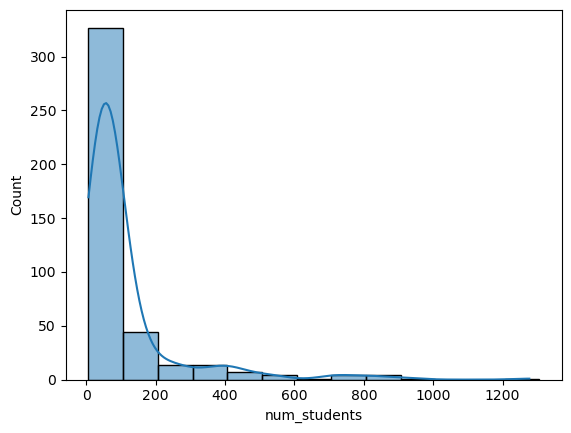

In [27]:
sns.histplot(data=df, x='num_students', binwidth=100, kde=True);

Note, that if we had set `y='num_students'` instead of `x='num_students'` the histogram would be horiztonal, with the `num_students` variable on the y-axis intead of the x-axis.

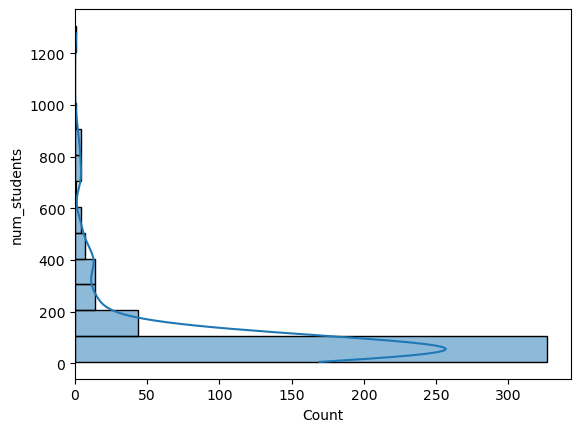

In [24]:
sns.histplot(data=df, y='num_students', binwidth=100, kde=True);

We can clearly see that there are a lot of schools that are smaller, with fewer than 100 students reporting SAT scores, and a small number of very large schools. In other words, this variable is "right-skewed" because the data on the right-hand side has a "long tail".

Let's look at the distribution of reading scores:

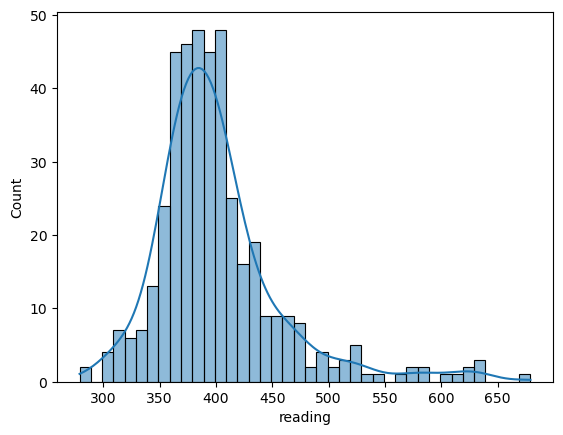

In [28]:
sns.histplot(data=df, x='reading', binwidth=10, kde=True);

We see that a lot of schools tend to report average reading scores of around 400, with a small number at the low end (300) and a small number at the high end (600).

While histograms are a common chart type for visualizing distributions, there are several other options, such as:

- Box plot
- Strip plot
- Swarm plot
- Density plot
- Violin plot
- Rug plot

Give them a try below. You can find more information about Seaborn's distribution plot options [here](https://seaborn.pydata.org/tutorial/distributions.html).

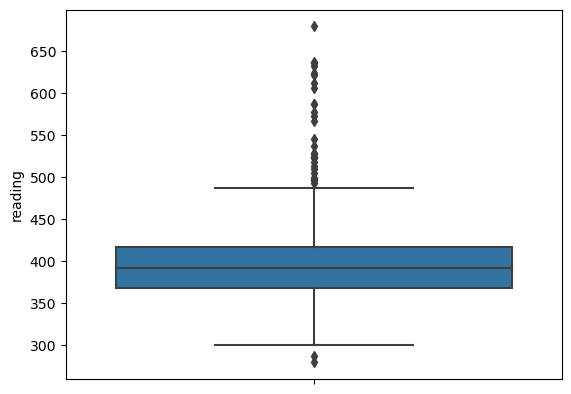

In [41]:
sns.boxplot(data=df, y='reading');

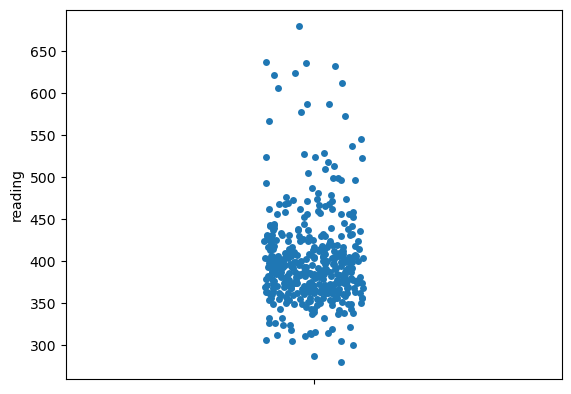

In [42]:
sns.stripplot(data=df, y='reading');

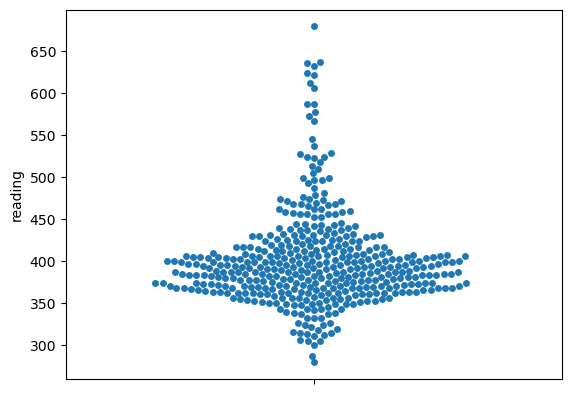

In [43]:
sns.swarmplot(data=df, y='reading');

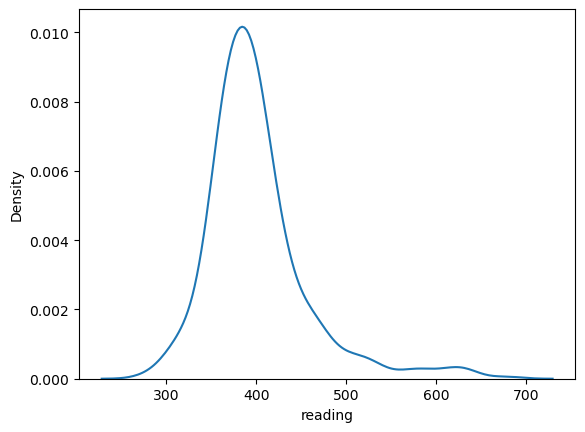

In [44]:
sns.kdeplot(data=df, x='reading');

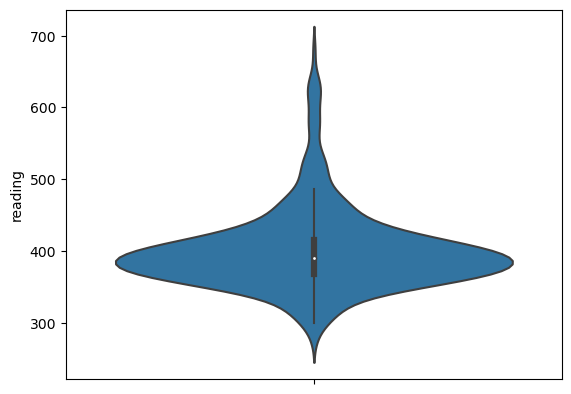

In [46]:
sns.violinplot(data=df, y='reading');

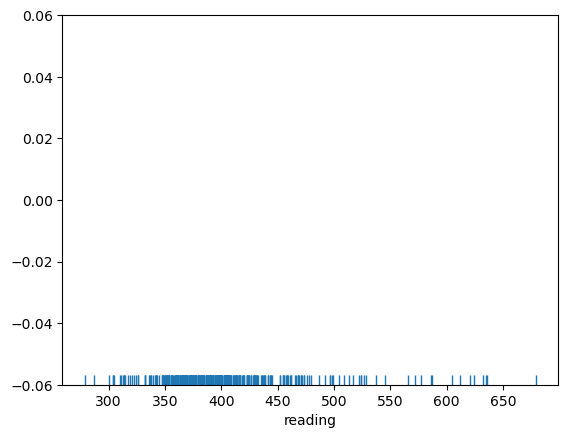

In [48]:
sns.rugplot(data=df, x='reading');

Let's take a look at the distribution of math scores:

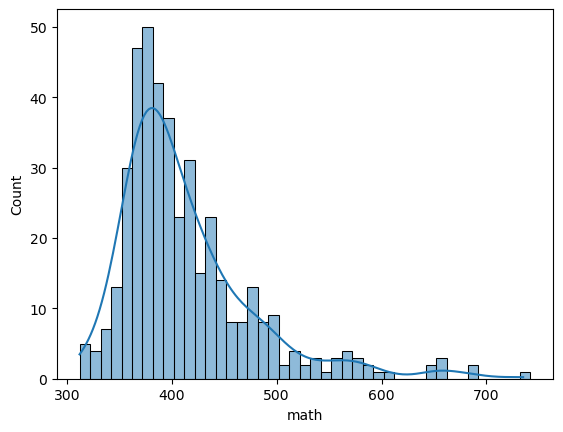

In [49]:
sns.histplot(data=df, x='math', binwidth=10, kde=True);

And finally, the same for writing scores:

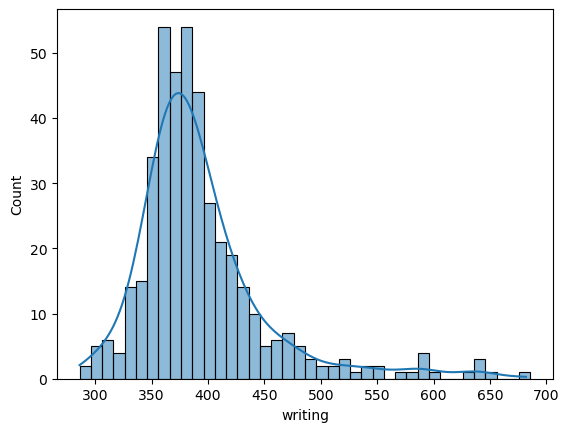

In [50]:
sns.histplot(data=df, x='writing', binwidth=10, kde=True);

Alternately, we could look at all distributions at once using `pairplot()`. This will also give us pairwise scatterplots for each pair of variables.

In the below, we can see that there appear to be strong correlations between many of these variables. Higher reading scores are positively correlated with higher math scores and higher writing scores. And the same appears to be true for math and writing. Also, it looks like `num_students` is losely correlated with higher test scores. with the very large schools tending to outperform.

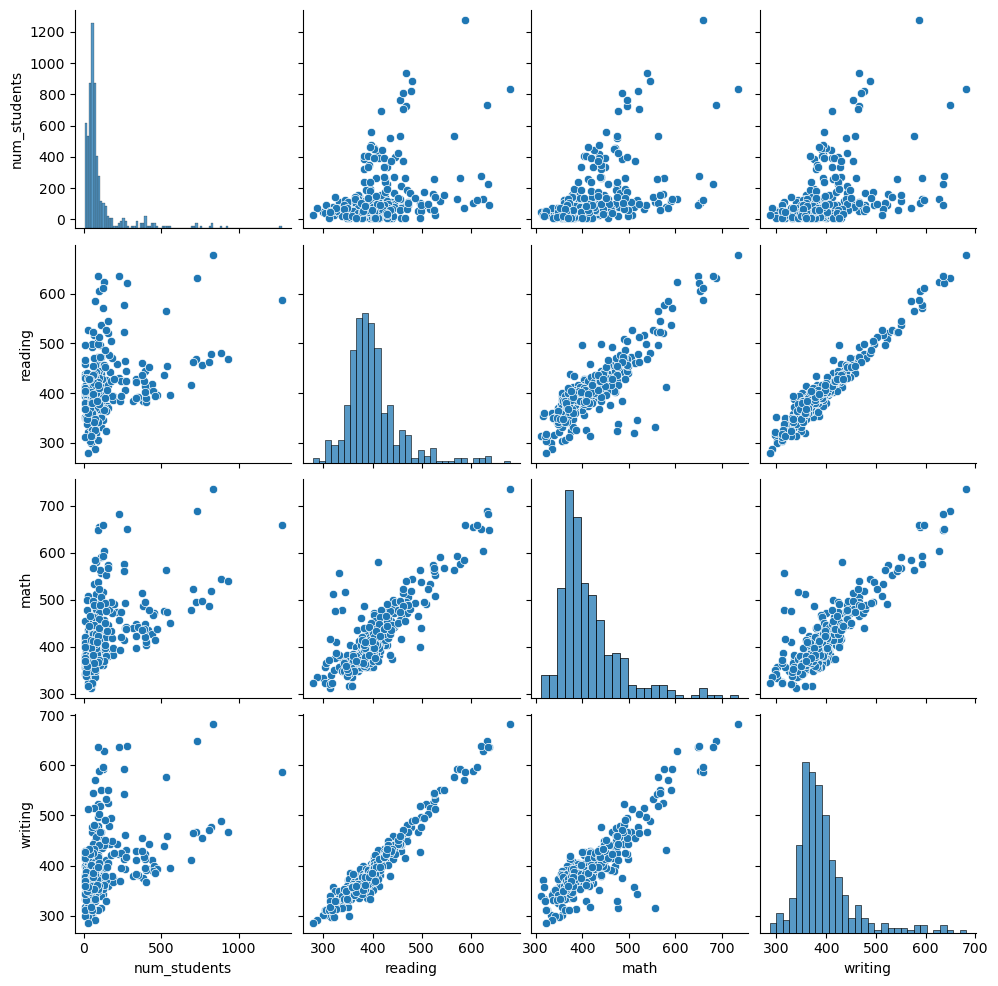

In [51]:
sns.pairplot(data=df);

Let's make a scatter plot of reading vs. math scores, and use size and color to represent the number of students.

We can see that there are several very large schools having high reading and math scores. Note that we use `.set_xlim()` and `.set_ylim()` to define the limits of the x-axis and y-axis.

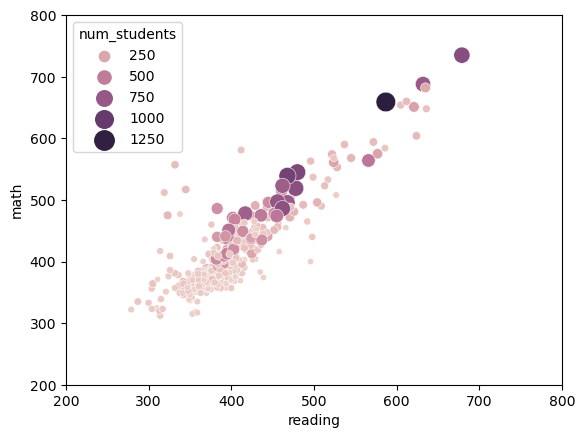

In [52]:
ax = sns.scatterplot(data=df, x='reading', y='math', size='num_students', sizes=(20, 200), hue='num_students')
ax.set_xlim(200,800)
ax.set_ylim(200,800);

It would be nice to make this scatterplot interactive, so the user could hover over individual dots to see more information about them.

Seaborn does not have interactive functionality built-in; seaborn is more for rapid exploratory data visualization with static plots.

However, we can use a library called [plotly](https://plotly.com/python/) which makes it easy to build interactive plots.

In [57]:
import plotly.express as px

In [60]:
px.scatter(df, x='reading', 
               y='math', 
               color="num_students",
               size='num_students', 
               hover_data=['school', 'reading', 'math', 'writing', 'num_students'])

### Join `df` to school location data

Just like that, we have an interactive scatter plot.

Let's say we want to use color to represent the Borough of the school, rather than number of students.

Well, we don't have any information about the borough of each school. In fact, we don't have any information about the location of the school at all.

In [62]:
df.head()

,DBN,school,num_students,reading,math,writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390,433,384


So, we'll need to find another dataset that contains information about school location.

Luckily, there is a dataset [here](https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr) that the locations for every school.

Note that this dataset is a shapefile, rather than a CSV. This means that we will need to load this data with a special function. As you can see below, Pandas' `read_csv()` function will not work with this dataset.

In [63]:
url = "https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr"

In [64]:
schools = pd.read_csv(url)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 21, saw 192


Luckily, there is a library called [geopandas](https://geopandas.org/en/stable/index.html) which is exactly like pandas plus capability to handle geospatial data.

Let's import `geopandas`:

In [65]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

Uh oh! It looks like `geopandas` is not installed in this environment.

That's OK: we can install it using `pip`, the package installer for Python. More about pip [here](https://pip.pypa.io/en/stable/).

Intall `geopandas` using `pip`, like this:

In [66]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/97/0a/b1525be9680369cc06dd288e12c59d24d5798b4afcdcf1b0915836e1caa6/pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.1 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric 1.7.2 requires python-louvain, which is not installed.


Now we can import `geopandas`.

In [67]:
import geopandas as gpd

Read in the school locations shapefile using the `read_file()` function in `geopandas`.

In [68]:
url = "https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip"

In [69]:
schools = gpd.read_file(url)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [70]:
schools.head()

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


We can generate a quick map of the school locations using `plot()`

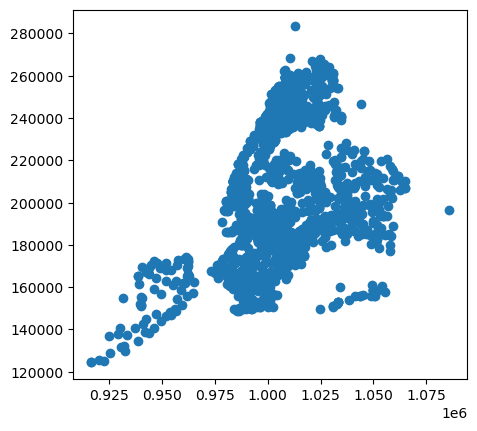

In [72]:
schools.plot();

We can even generate an interactive map using `explore()`

In [74]:
schools.explore()

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

Ah, it looks like we need to install some additional packages in order to use `explore()`.

In [75]:
!pip install folium
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.23 from https://files.pythonhosted.org/packages/89/ac/53100546dcd9aa400a73c7770b13cad9a3b18bf83433499e36b5efe9850f/numpy-1.26.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.2 MB/s eta 0:00:00
  Obtaining dependency information for numpy>=1.23 from https://files.pythonhosted.org/packages/69/1f/c95b1108a9972a52d7b1b63ed8ca70466b59b8c1811bd121f1e667cc45d8/numpy-1.25.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installat

In [76]:
schools.explore()

Great! Now how do we join the school location data to the SAT scores data?

Well, it looks like there is a column `ATS_CODE` in `schools` which we can join to the `DBN` column in `df`. This is a unique identifier for each school, so we should be able to use this join the location of each school to the SAT scores. This is similar to doing and "index / match" in Excel, where the school ID is the unique value that you are performing the match on.

In [80]:
df.head(2)

,DBN,school,num_students,reading,math,writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383,423,366


In [81]:
schools.head(2)

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)


Let's try: join `schools` onto `df` using pandas `merge()` function. Specify the columns containing the unique ID with `left_on` and `right_on`.

In [87]:
pd.merge(df, schools, left_on='DBN', right_on='ATS_CODE')

,DBN,school,num_students,reading,math,writing,ATS_CODE,BORO,BORONUM,LOC_CODE,...,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,01M458,FORSYTH SATELLITE ACADEMY,7.0,414,401,359,01M458,M,1.0,M458,...,1,198 FORSYTH STREET,NY,10002,Ingrid Roberts Haynes,212-677-8900,TBD,"09,10,11,12",MANHATTAN,POINT (986892.000 202472.000)
1,02M551,THE URBAN ASSEMBLY NEW YORK HARBOR SCHOOL,77.0,405,423,384,02M551,M,1.0,M551,...,2,550 SHORT AVENUE,NY,10004,Nathan Dudley,212-458-0800,212-458-0801,"09,10,11,12,SE",NEW YORK,POINT (978565.849 190956.297)
2,12X446,ARTURO A. SCHOMBURG SATELLITE ACADEMY BRONX,14.0,380,372,349,12X446,X,2.0,X446,...,12,1010 REV. J. A. POLITE AVENUE,NY,10459,MARSHA VERNON,718-542-2700,TBD,"09,10,11,12",BRONX,POINT (1012316.423 239238.302)
3,28Q338,QUEENS SATELLITE HIGH SCHOOL FOR OPPORTUNITY,6.0,403,408,367,28Q338,Q,4.0,Q338,...,28,162-02 HILLSIDE AVENUE,NY,11432,Mark Melkonian,718-657-3920,None,"09,10,11,12,SE",QUEENS,POINT (1039818.599 197380.102)
4,28Q350,JAMAICA GATEWAY TO THE SCIENCES,25.0,430,452,425,28Q350,Q,4.0,Q350,...,28,167-01 GOTHIC DRIVE,NY,11432,Caren Birchwood Taylor,718-935-3429,None,"09,10,11,12,SE",JAMAICA,POINT (1040269.620 199526.734)


Hmm... it looks like only 5 rows joined successfuly. How many schools do we have in our SAT score dataset?

In [89]:
df.shape

(421, 6)

We have 421 schools in the SAT dataset, but only 5 of them successfully matched with a school location. What's happening?

This is a common situation in data analysis: When you are working with real-world data, there will often be problems with the data that require you to investigate or "debug" the root causes of errors. Sometimes this can be quite challenging and time-consuming.

A good first step in debugging is to investigate a particular instance of the problem.

For example, there is a particular school with DBN `01M292` in the SAT scores dataset. Does it exist in the school locations dataset?

In [94]:
df.query("DBN == '01M292'")

,DBN,school,num_students,reading,math,writing
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355,404,363


In [91]:
schools.query("ATS_CODE == '01M292'")

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry


Hmm... it looks like no, it doesn't. Is that because it truly is not there? Or perhaps there is some other issue?

Let's look at the values in the `ATS_CODE` column of `schools`.

In [99]:
schools['ATS_CODE'].values

array(['15K001 \xa0\xa0\xa0\xa0\xa0', '17K002 \xa0\xa0\xa0\xa0\xa0',
       '21K095 \xa0\xa0\xa0\xa0\xa0', ..., '84X539', '84X553', '84X554'],
      dtype=object)

Strange! There seems to be a bunch of weird characters in this column. It looks like `\xa0` is repeated several times.

What does `\xa0` mean? When it doubt, google it...

According to a google search: In Python, `\xa0` is a character escape sequence that represents a non-breaking space.

So these are spaces in the data, represented by a special character sequence `\xa0`. This could be what's causing our error!

Let's create a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to split the `ATS_CODE` on the first space, and only take the first part (which we do with `[0]`, taking the item in position 0). In Python, `lambda` is a special keyword which allows you to create a small, unnamed function on the fly. We use `apply` to apply this function to every row in the column at once.

In [100]:
schools['ID'] = schools['ATS_CODE'].apply(lambda x: str(x).split(" ")[0])

Check to make sure we have successfully cleaned this data:

In [104]:
schools['ID'].values

array(['15K001', '17K002', '21K095', ..., '84X539', '84X553', '84X554'],
      dtype=object)

Looks good! Now we can try again with the `merge()`. Create a new dataframe called `df_merged`.

In [111]:
df_merged = pd.merge(df, schools, left_on='DBN', right_on='ID')

In [112]:
df_merged.head(2)

,DBN,school,num_students,reading,math,writing,ATS_CODE,BORO,BORONUM,LOC_CODE,...,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry,ID
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355,404,363,01M292,M,1.0,M292,...,220 HENRY STREET,NY,10002,Erin Balet,212-406-9411,212-406-9417,"06,07,08,09,10,11,12,SE",MANHATTAN,POINT (987961.239 199185.297),01M292
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383,423,366,01M448,M,1.0,M448,...,200 MONROE STREET,NY,10002,Elizabeth Collins,212-962-4341,212-267-5611,"09,10,11,12,SE",MANHATTAN,POINT (988681.961 198801.762),01M448


In [113]:
df_merged.shape

(412, 25)

It looks like 412 schools have merged successfully after we fixed that issue.

### Visualizing SAT Scores by Borough

Now that we have location information, we can do a bunch of additional interesting visualizations.

For example, we can visualize the distributions of score segmented by borough:

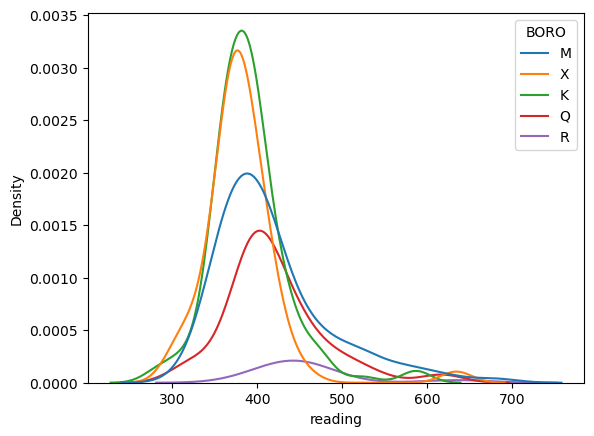

In [115]:
sns.kdeplot(data=df_merged, x='reading', hue='BORO');

Notice how the boroughs have shortened names, with "M" for Manhattan, "K" for Kings County (i.e. Brooklyn), etc?

Let's make the chart a bit more readable by updating the boro names to the full words. 

We can accomplish this with `replace()`:

In [127]:
df_merged['BORO'] = df_merged['BORO'].replace("M", "Manhattan")
df_merged['BORO'] = df_merged['BORO'].replace("X", "Bronx")
df_merged['BORO'] = df_merged['BORO'].replace("K", "Brooklyn")
df_merged['BORO'] = df_merged['BORO'].replace("Q", "Queens")
df_merged['BORO'] = df_merged['BORO'].replace("R", "Staten Island")

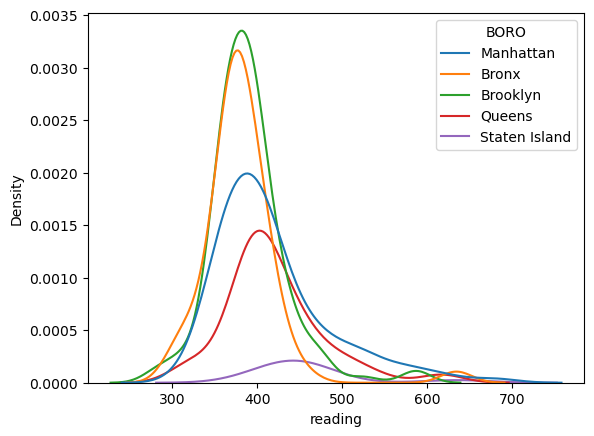

In [128]:
sns.kdeplot(data=df_merged, x='reading', hue='BORO');

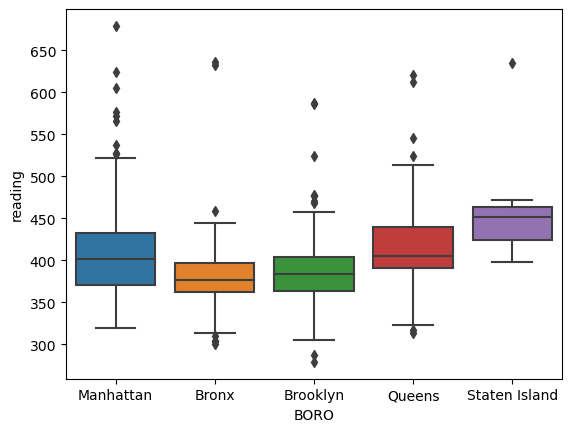

In [129]:
sns.boxplot(data=df_merged, y='reading', x='BORO');

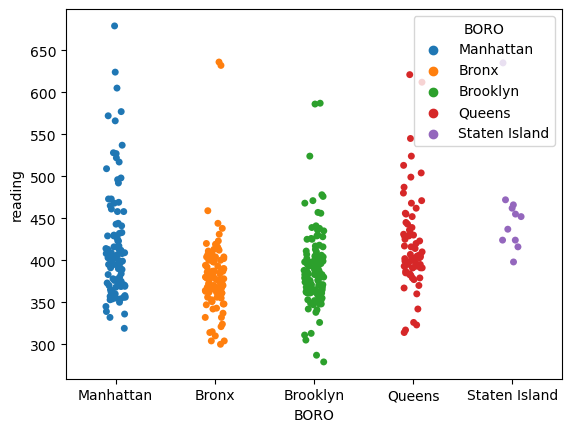

In [130]:
sns.stripplot(data=df_merged, y='reading', x='BORO', hue='BORO');

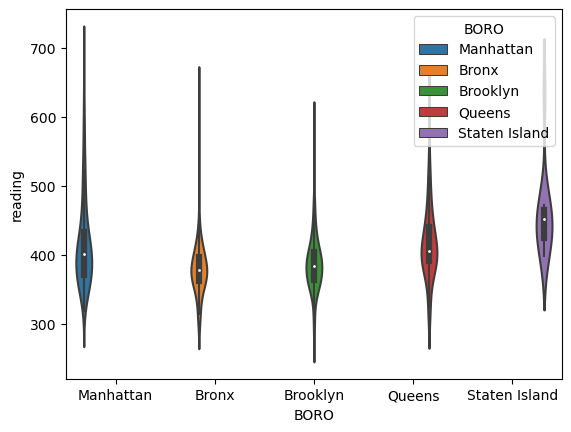

In [131]:
sns.violinplot(data=df_merged, y='reading', x='BORO', hue='BORO');

Now we can used Borough in our scatterplot to define color:

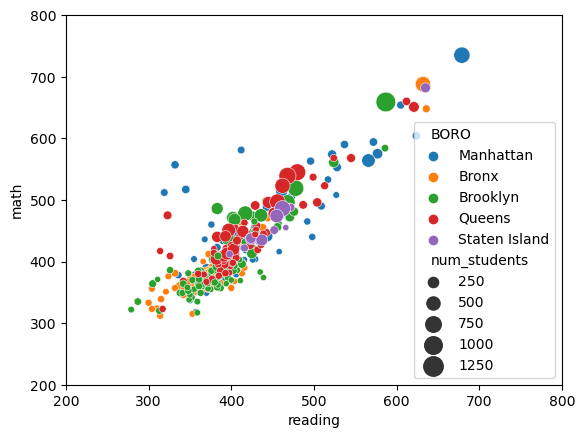

In [134]:
ax = sns.scatterplot(data=df_merged, x='reading', y='math', size='num_students', sizes=(20, 200), hue='BORO')
ax.set_xlim(200,800)
ax.set_ylim(200,800);

Again, we can use plotly to make it interactive:

In [138]:
px.scatter(df_merged, x='reading', 
               y='math', 
               color="BORO",
               size='num_students', 
               hover_data=['school', 'reading', 'math', 'writing', 'num_students'])

We can see that there are several schools in Manhattan with higher scores, especialyl some larger schools. And schools in the Bronx tend to have lower scores, with the exception of a few large schools like Bronx High School of Science.